In [23]:
# Import the necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the data set
(x_train, y_train), (x_test, y_test) = mnist.load_data('/home/barbara/Documents/Codettes/MNIST_data/mnist.npz')

In [3]:
# Number of training examples
n_train = x_train.shape[0]

# Number of testing examples.
n_test = x_test.shape[0]

# What's the shape of an traffic sign image?
image_shape = [x_train.shape[1], x_train.shape[2]]

# How many unique classes/labels there are in the dataset.
n_classes = len(set(y_train))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 60000
Number of testing examples = 10000
Image data shape = [28, 28]
Number of classes = 10


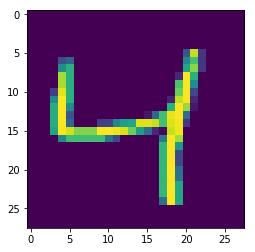

In [4]:
# Plot one training image
plt.imshow(x_train[2,:])

Label distribution of training:
 [5923 6742 5958 6131 5842 5421 5918 6265 5851 5949]

Relative label distribution of training:
 [ 0.87852269  1.          0.88371403  0.90937407  0.86650845  0.80406408
  0.87778107  0.92924948  0.86784337  0.88237912]


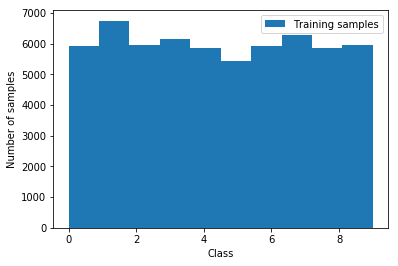

In [5]:
# Check distribution of labels
y_train_hist = np.histogram(y_train, n_classes)
print("Label distribution of training:\n", y_train_hist[0])
print()
print("Relative label distribution of training:\n",y_train_hist[0]/max(y_train_hist[0]))
relative_number_train = np.floor(max(y_train_hist[0])/y_train_hist[0])

# Plot a histogram of the number of training samples over the classes
plt.hist(y_train, n_classes)
plt.ylabel('Number of samples');
plt.xlabel('Class');
plt.legend(['Training samples', 'Validation samples'])

In [10]:
#Reshape the training and test set
X_train = np.expand_dims(x_train, axis=3)
X_test = np.expand_dims(x_test, axis=3)

#Padding the images by 2 pixels since in the paper input images were 32x32
X_train = np.pad(X_train, ((0,0),(2,2),(2,2),(0,0)), 'constant')
X_test = np.pad(X_test, ((0,0),(2,2),(2,2),(0,0)), 'constant')

#Standardization
mean_px = X_train.mean().astype(np.float32)
std_px = X_train.std().astype(np.float32)
X_train = (X_train - mean_px)/(std_px)

#One-hot encoding the labels
from keras.utils.np_utils import to_categorical
Y_train = to_categorical(y_train)

# Check the size of the one-hot encoded labels
print("Size of the one-hot encoded trainings set:\n", Y_train.shape)

Size of the one-hot encoded trainings set:
 (60000, 10)


In [11]:
# Import all the layers that we need for building up the LeNet architecture
import keras 
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

#LeNet architecture
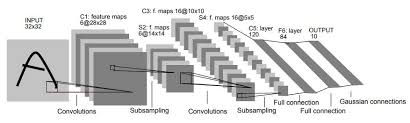

In [12]:
# Build up the model

model = Sequential()
#Layer 1
#Conv Layer 1
model.add(Conv2D(filters = 6, 
                 kernel_size = 5, 
                 strides = 1, 
                 activation = 'relu', 
                 input_shape = (32,32,1)))
#Pooling layer 1
model.add(MaxPooling2D(pool_size = 2, strides = 2))

#Layer 2
#Conv Layer 2
model.add(Conv2D(filters = 16, 
                 kernel_size = 5,
                 strides = 1,
                 activation = 'relu',
                 input_shape = (14,14,6)))
#Pooling Layer 2
model.add(MaxPooling2D(pool_size = 2, strides = 2))
#Flatten
model.add(Flatten())

#Layer 3
#Fully connected layer 1
model.add(Dense(units = 120, activation = 'relu'))

#Layer 4
#Fully connected layer 2
model.add(Dense(units = 84, activation = 'relu'))

#Layer 5
#Output Layer
model.add(Dense(units = 10, activation = 'softmax'))

In [13]:
# Print the model architecture
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 6)         156       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 400)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 120)               48120     
_________________________________________________________________
dense_2 (Dense)              (None, 84)                10164     
__________

In [14]:
# Train the model using Adam optimizer and categorical_crossentropy

# Check if 
## the loss is decreasing
## the accuracy is increasing

model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
model.fit(X_train ,Y_train, epochs = 1)

Epoch 1/1
60000/60000 [==============================] - 60s 1ms/step - loss: 0.1470 - acc: 0.9550


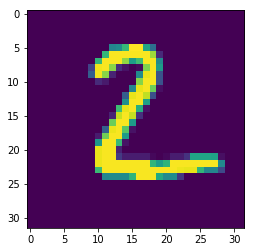

In [15]:
# Show one sample test image
plt.imshow(X_test[1][:,:,-1])
test_image = np.expand_dims(X_test[1,:], axis=0)

In [19]:
# Predict the class of this test image
y_pred = model.predict(test_image)
print("One-hot-encoded output vector", y_pred)

# Find the respective class
y_pred_class = np.argmax(y_pred, axis = 1)
print("Predicted class = ", y_pred_class)

One-hot-encoded output vector [[ 0.  0.  1.  0.  0.  0.  0.  0.  0.  0.]]
Predicted class =  [2]


In [20]:
# Predict on all test data
y_pred = model.predict(X_test)

In [21]:
#Converting one hot vectors to class labels
pred_labels = np.argmax(y_pred, axis = 1)

In [24]:
# Compare prediction with ground truth labels
from sklearn.metrics import accuracy_score

accuracy_score(y_test, pred_labels)

0.98160000000000003